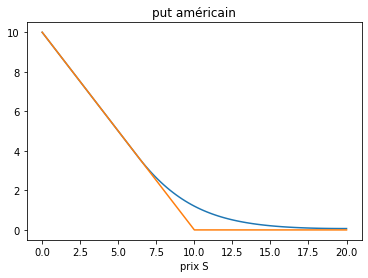

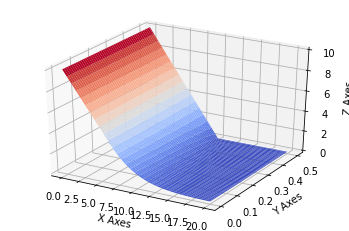

In [5]:
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
# put americain


#1 condtion aux limites de von neuman
L=20
K=10
T=0.5
r=0.1
sigma=0.5
N=99
M=4999
S=np.linspace(0,L,N+2)
t=np.linspace(0,T,M+2)
dt=T/(M+2)
ds=L/(N+2)
V=np.zeros((M+2,N+2))



for i in range(M+2):
    V[i]=[0]*(N+2)

def conditionfinale(S):
    K=10
    return max(K-S,0)

 
for i in range(N+2):
    V[M+1][i]=conditionfinale(S[i])
    


for n in range(M+1,0,-1):
    for i in range(0,N+1):
        
        V[n-1][i]= max(K-S[i],V[n][i]+dt*(r*S[i]*(V[n][i+1]-V[n][i-1])/(2*ds)+1/2*sigma**2*S[i]**2*(V[n][i+1]+V[n][i-1]-2*V[n][i])/(ds*ds)-r*V[n][i]))
        
    V[n-1][N+1]=V[n-1][N]  # condition de neuman 
    V[n-1][0]=V[n-1][1] +ds    # condtion de neuman


# plot de la condition aux limites de neuman
plt.plot(S,V[0])
plt.plot(S,V[M+1])
plt.xlabel("prix S")

plt.title("put américain")
plt.show()


fig = plt.figure()
ax = plt.axes(projection="3d")
 
#Labeling
ax.set_xlabel('X Axes')
ax.set_ylabel('Y Axes')
ax.set_zlabel('Z Axes')
ax.set_label('put américain condition ')
S,t=np.meshgrid(S,t)


V=np.array(V)

#ax.plot_surface(S,t,V,cmap=gradient(V))

ax.plot_surface(S,t,V,cmap=cm.coolwarm)


plt.show()



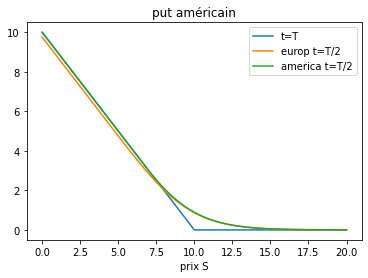

In [18]:
# comparaison de put américain et europeen

#1 condtion aux limites de von neuman
L=20
K=10
T=0.5
r=0.1
sigma=0.5
N=99
M=4999
S=np.linspace(0,L,N+2)
t=np.linspace(0,T,M+2)
dt=T/(M+2)
ds=L/(N+2)
V_ame=np.zeros((M+2,N+2))
V_eur = np.zeros((M+2,N+2))



def conditionfinale(S):
    K=10
    return max(K-S,0)

 
for i in range(N+2):
    V_ame[M+1][i]=conditionfinale(S[i])
    V_eur[M+1][i]=conditionfinale(S[i])
    
    


for n in range(M+1,0,-1):
    for i in range(0,N+1):
        
        V_eur[n-1][i]=V_eur[n][i]+dt*(r*S[i]*(V_eur[n][i+1]-V_eur[n][i-1])/(2*ds)+1/2*sigma**2*S[i]**2*(V_eur[n][i+1]+V_eur[n][i-1]-2*V_eur[n][i])/(ds*ds)-r*V_eur[n][i])
        
        V_ame[n-1][i]= max(K-S[i],V_ame[n][i]+dt*(r*S[i]*(V_ame[n][i+1]-V_ame[n][i-1])/(2*ds)+1/2*sigma**2*S[i]**2*(V_ame[n][i+1]+V_ame[n][i-1]-2*V_ame[n][i])/(ds*ds)-r*V_ame[n][i]))
   
    V_eur[n-1][N+1]=V_eur[n-1][N]  # condition de neuman 
    
    V_eur[n-1][0]=V_eur[n-1][1] +ds    # condtion de neuman
    
    V_ame[n-1][N+1]=V_ame[n-1][N]  # condition de neuman 
    
    V_ame[n-1][0]=V_ame[n-1][1] +ds    # 


# plot de la condition aux limites de neuman
plt.plot(S,V_eur[M+1] )
plt.plot(S,V_eur[(M+1)//2])
plt.plot(S,V_ame[(M+1)//2])
plt.legend(('t=T', 'europ t=T/2', 'america t=T/2'),
           loc='upper right')

plt.xlabel("prix S")

plt.title("put américain")
plt.show()
